# **Pulsar Star Classification Project**

## **Introduction**
This assignment aims to develop a machine learning classifier model to identify pulsar stars based on the data derived from 
astronomical imaging. **Pulsar stars** are a unique form of neutron stars whose radio emissions are discernible on Earth, serving as invaluable cosmic probes for the examination of space-time and diverse states of matter. Despite their significance, distinguishing genuine pulsar signals amidst the predominant radio frequency interference and noise poses a formidable challenge. 

## **Objective**

The core objective of this project is to construct and assess predictive models capable of discerning whether a detected signal emanates from a pulsar star or other sources such as noise and interferences. By analyzing the dataset provided, the endeavor is to capture the relationship between the descriptive features and the target feature, termed "target_class", thereby facilitating the accurate classification of a star as a pulsar.


## **Dataset Description**
The dataset used for this project was downloaded from brightspace, I downloaded the dataset associated with my student number 17328666. The project dataset is comprised of eight continuous variables describing each candidate, bifurcated into two distinct categories. The initial four variables are derived from the integrated pulse profile, representing a longitude-resolved, time and frequency-averaged version of the signal. The latter four are extracted from the DM-SNR (Dispersion Measure-Signal to Noise Ratio) curve. These variables encapsulate the following attributes:

- Mean of the Integrated Profile: This refers to the average value of the integrated pulse profile.
- Standard Deviation of the Integrated Profile: It represents the extent of variation from the mean value in the integrated pulse profile.
- Excess Kurtosis of the Integrated Profile: This metric gauges the tailedness of the integrated pulse profile distribution.
- Skewness of the Integrated Profile: It measures the asymmetry in the integrated pulse profile distribution.
- Mean of the DM-SNR Curve: This is the average value of the DM-SNR curve.
- Standard Deviation of the DM-SNR Curve: It depicts the degree of variation from the mean value in the DM-SNR curve.
- Excess Kurtosis of the DM-SNR Curve: This metric evaluates the tailedness of the DM-SNR curve distribution.
- Skewness of the DM-SNR Curve: It measures the asymmetry in the DM-SNR curve distribution.

In [1]:
# importing necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

import missingno as msno


In [2]:
# loading data
data = pd.read_csv('pulsar_star_17328666.csv')
data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,69.796875,39.135254,1.575813,4.686157,4.503344,28.027175,6.969244,50.088771,1
1,113.203125,40.798736,0.236092,0.691055,0.894649,10.383239,16.282813,332.346422,0
2,121.484375,46.806447,0.146787,0.248659,3.040134,18.069822,8.140009,79.899133,0
3,143.757812,52.193861,-0.090352,-0.566504,1.818562,13.144096,10.890333,153.854444,0
4,109.601562,55.037394,0.214880,-0.362173,2.529264,NaN,8.390333,NaN,0
...,...,...,...,...,...,...,...,...,...
9995,112.101562,53.259365,0.269043,-0.091501,2.157191,14.858599,9.889504,119.651193,0
9996,128.789062,48.736962,0.123297,-0.010218,2.989967,19.013590,9.212113,99.183431,0
9997,139.195312,47.995289,-0.052550,0.152288,2.146321,18.278535,10.086475,110.257584,0
9998,130.843750,43.493074,-0.098430,0.706602,5.115385,25.231969,5.590779,33.563135,0


In [3]:
# rename dataset columns
data = data.rename(columns={' Mean of the integrated profile':"mean_integrated_profile",
       ' Standard deviation of the integrated profile':"std_deviation_integrated_profile",
       ' Excess kurtosis of the integrated profile':"kurtosis_integrated_profile",
       ' Skewness of the integrated profile':"skewness_integrated_profile", 
        ' Mean of the DM-SNR curve':"mean_dm_snr_curve",
       ' Standard deviation of the DM-SNR curve':"std_deviation_dm_snr_curve",
       ' Excess kurtosis of the DM-SNR curve':"kurtosis_dm_snr_curve",
       ' Skewness of the DM-SNR curve':"skewness_dm_snr_curve",
       })

### **Task 1:** Prepare a data quality plan for the dataset. Mark down all the features where there  are potential problems or data quality issues. Propose solutions to deal with the problems  identified. Explain why you chose one solution over potentially many other. It is very  important to provide justification for your thinking in this part and to list potential solutions,  including the solution that will be implemented to clean the data. In particular, pay attention  to missing data and carefully address this issue. [15 marks] 

**Basic Data Exploration**

In [4]:
# get statistical description of the dataset
data.describe()

,mean_integrated_profile,std_deviation_integrated_profile,kurtosis_integrated_profile,skewness_integrated_profile,mean_dm_snr_curve,std_deviation_dm_snr_curve,kurtosis_dm_snr_curve,skewness_dm_snr_curve,target_class
count,10000.000000,10000.000000,8607.000000,10000.000000,10000.000000,9028.000000,10000.000000,9500.000000,10000.000000
mean,111.063741,46.524734,0.484061,1.775286,12.640597,26.390780,8.310517,104.973400,0.091900
std,25.693491,6.833823,1.071684,6.197844,29.576861,19.611599,4.525558,106.650347,0.288899
min,6.500000,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.828125,42.372586,0.024312,-0.187401,1.925585,14.420402,5.797394,35.211221,0.000000
50%,115.101562,46.928178,0.226454,0.201928,2.818562,18.467852,8.407720,82.167904,0.000000
75%,127.267578,50.946839,0.478182,0.940055,5.418060,28.408572,10.686814,139.009551,0.000000
max,185.257812,91.808628,7.879628,63.466388,222.421405,110.642211,34.539844,1191.000837,1.000000


**Insights**

**Integrated Profile Features:**
- Mean: The average value of the integrated profile ranges from 6.5 to 185.26 with a mean of 111.06 and a standard deviation of 25.69, suggesting a wide spread of data.
- Standard Deviation: With a mean of 46.52 and a standard deviation of 6.83, this feature appears to be less spread out as compared to the mean of the integrated profile.
- Excess Kurtosis: Exhibiting a mean of 0.48 and a standard deviation of 1.07, the excess kurtosis feature has values stretching from -1.74 to 7.88. This implies varying degrees of tailedness across the data points.
- Skewness: Skewness values range from -1.79 to 63.47 with a mean of 1.78 and a standard deviation of 6.20, indicating an asymmetrical distribution with a positive skew in general.

**DM-SNR Curve Features:**

- Mean: The DM-SNR curve's mean value exhibits a broad range from 0.21 to 222.42 with an average value of 12.64 and a standard deviation of 29.58, hinting at a considerable spread of data points.
- Standard Deviation: With a mean of 26.39 and a standard deviation of 19.61, this feature also shows a substantial dispersion of values ranging from 7.37 to 110.64.
- Excess Kurtosis: The data points for excess kurtosis of the DM-SNR curve span from -3.14 to 34.54 with a mean of 8.31 and a standard deviation of 4.53, indicating a diverse range of tailedness.
- Skewness: This feature demonstrates a significant skew with values ranging from -1.98 to 1191.00, a mean of 104.97, and a standard deviation of 106.65. This suggests a highly asymmetrical distribution with a pronounced positive skew.

In [5]:
# check null value counts and dtypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   mean_integrated_profile           10000 non-null  float64
 1   std_deviation_integrated_profile  10000 non-null  float64
 2   kurtosis_integrated_profile       8607 non-null   float64
 3   skewness_integrated_profile       10000 non-null  float64
 4   mean_dm_snr_curve                 10000 non-null  float64
 5   std_deviation_dm_snr_curve        9028 non-null   float64
 6   kurtosis_dm_snr_curve             10000 non-null  float64
 7   skewness_dm_snr_curve             9500 non-null   float64
 8   target_class                      10000 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 703.2 KB


**Insights**

- Out of the eight descriptive features, two columns, Excess kurtosis of the integrated profile, Skewness of the DM-SNR curve and Standard deviation of the DM-SNR curve, have missing values with non-null counts of 8,607, 95,00 and 9,028, respectively. 
- All features are represented as floating-point numbers (float64), except for the target_class, which is an integer type (int64).

0    9081
1     919
Name: target_class, dtype: int64


<AxesSubplot:>

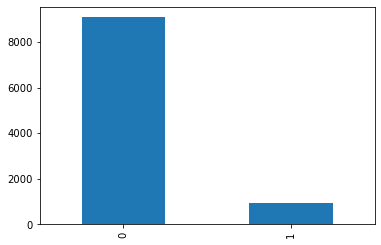

In [6]:
# data target class view
print(data.target_class.value_counts())
data.target_class.value_counts().plot(kind='bar')

**Insights**

The bar chart represents the distribution of two classes in the target variable, labeled as '0' and '1'. It shows an imbalanced class distribution, with class '0' being considerably more prevalent (almost 90%) than class '1' (almost 10%).

In [7]:
# checking for outliers
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Count and print the number of outliers in each column
for col in data.columns:
    if data[col].dtype in ['float64', 'int64']:  # Only consider numeric columns
        num_outliers = count_outliers(data[col])
        print(f'{col}: {num_outliers} outliers')

mean_integrated_profile: 570 outliers
std_deviation_integrated_profile: 156 outliers
kurtosis_integrated_profile: 782 outliers
skewness_integrated_profile: 1069 outliers
mean_dm_snr_curve: 1643 outliers
std_deviation_dm_snr_curve: 1198 outliers
kurtosis_dm_snr_curve: 288 outliers
skewness_dm_snr_curve: 497 outliers
target_class: 919 outliers


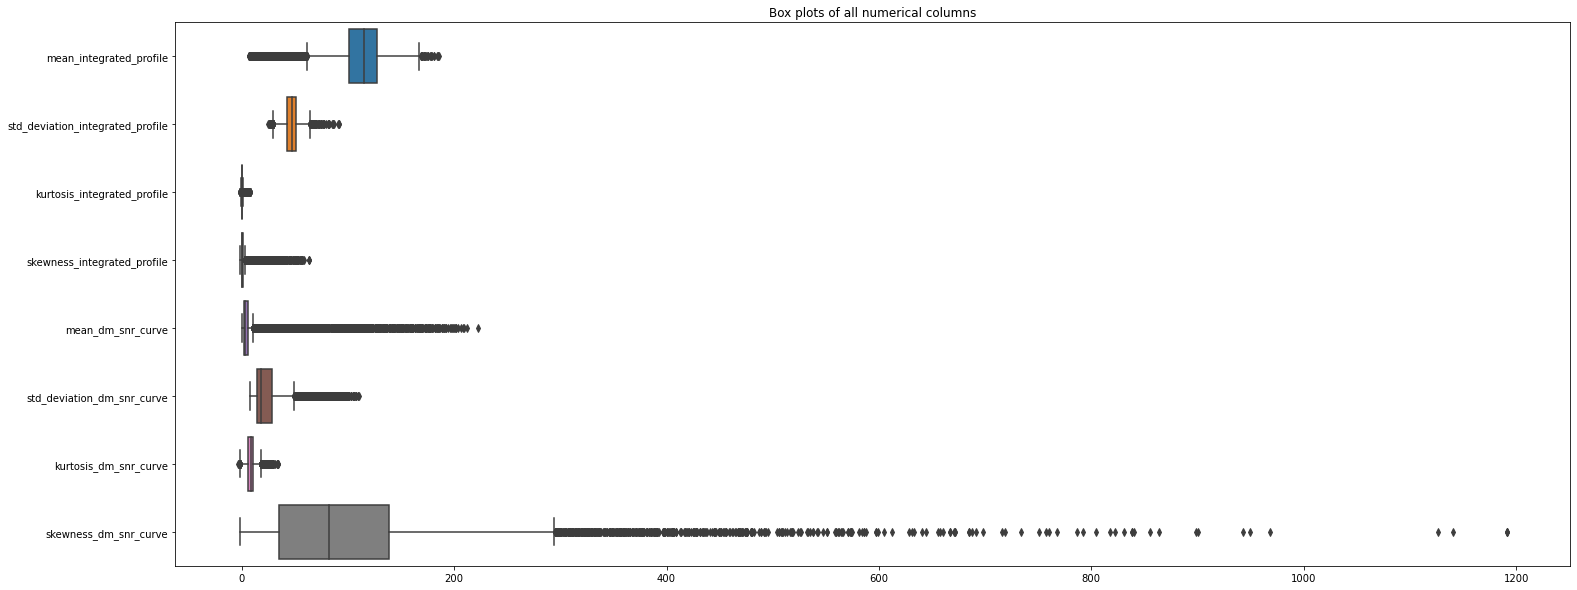

In [8]:
# Plot box plots for each column both classes
plt.figure(figsize=(25, 10))
sns.boxplot(data=data.select_dtypes(include=['float64']), orient='h')
plt.title('Box plots of all numerical columns')
plt.show()

In [9]:
# Splitting the DataFrame based on the target class
data_class_0 = data[data['target_class'] == 0]
data_class_1 = data[data['target_class'] == 1]


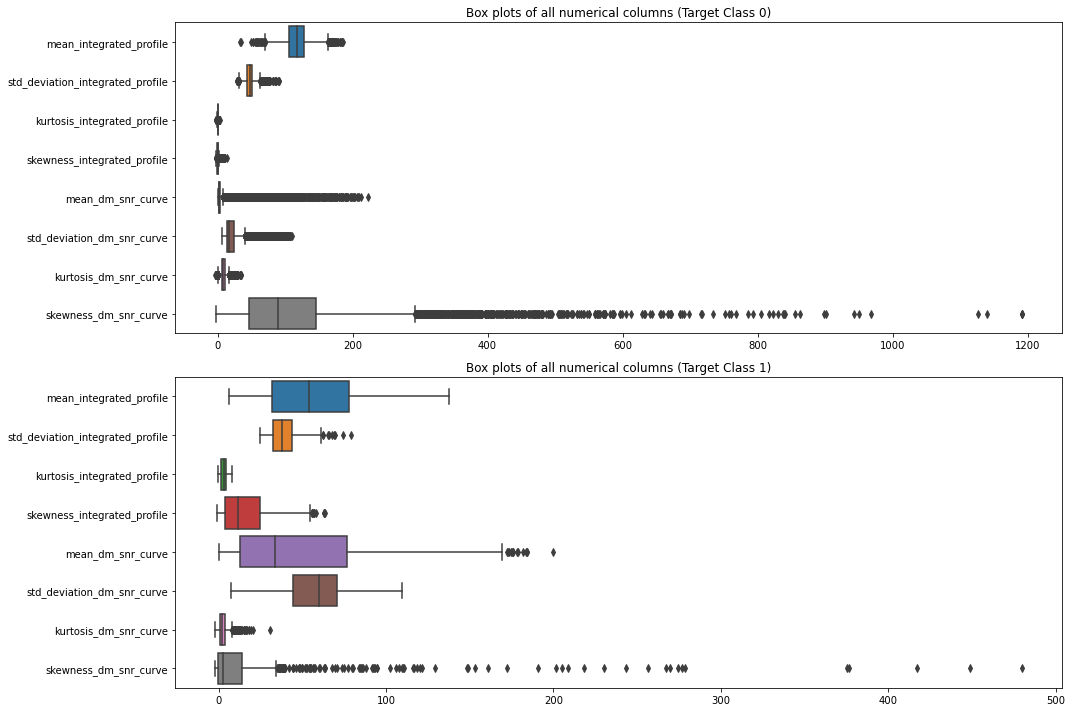

In [10]:
# Plotting box plots for each target class
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.boxplot(data=data_class_0.drop(columns=['target_class']), orient='h')
plt.title('Box plots of all numerical columns (Target Class 0)')

plt.subplot(2, 1, 2)
sns.boxplot(data=data_class_1.drop(columns=['target_class']), orient='h')
plt.title('Box plots of all numerical columns (Target Class 1)')

plt.tight_layout()  # Adjusts the space between the plots
plt.show()

The skewness and kurtosis (which deal with the shape of the data distribution) of both integrated profile and DM-SNR curve seem especially varied between the two classes.

In [11]:
# Quantify missing values
missing_data = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Calculate mean, median and std. deviation for each column
column_mean = data.mean()
column_median = data.median()
column_std = data.std()

missing_df = pd.DataFrame({
    'Total Missing': missing_data,
    'Percentage': missing_percentage,
    'Mean': column_mean,
    'Median': column_median,
    'Std. Deviation': column_std
})

missing_df


,Total Missing,Percentage,Mean,Median,Std. Deviation
mean_integrated_profile,0,0.00,111.063741,115.101562,25.693491
std_deviation_integrated_profile,0,0.00,46.524734,46.928178,6.833823
kurtosis_integrated_profile,1393,13.93,0.484061,0.226454,1.071684
skewness_integrated_profile,0,0.00,1.775286,0.201928,6.197844
mean_dm_snr_curve,0,0.00,12.640597,2.818562,29.576861
std_deviation_dm_snr_curve,972,9.72,26.390780,18.467852,19.611599
kurtosis_dm_snr_curve,0,0.00,8.310517,8.407720,4.525558
skewness_dm_snr_curve,500,5.00,104.973400,82.167904,106.650347
target_class,0,0.00,0.091900,0.000000,0.288899


Given the distribution of data points in columns with missing values, it seems ideal to use the median to fill in the missing values because the median value is robust to outliers, the data has a broad spread around the mean and has a large standard deviation. 

There's a significant difference between the mean and median, and a large standard deviation in this dataset which is why the median is used.


In [12]:
# Impute missing values based on the suggestions
data['kurtosis_integrated_profile'].fillna(data['kurtosis_integrated_profile'].median(), inplace=True)
data['std_deviation_dm_snr_curve'].fillna(data['std_deviation_dm_snr_curve'].median(), inplace=True)
data['skewness_dm_snr_curve'].fillna(data['skewness_dm_snr_curve'].median(), inplace=True)

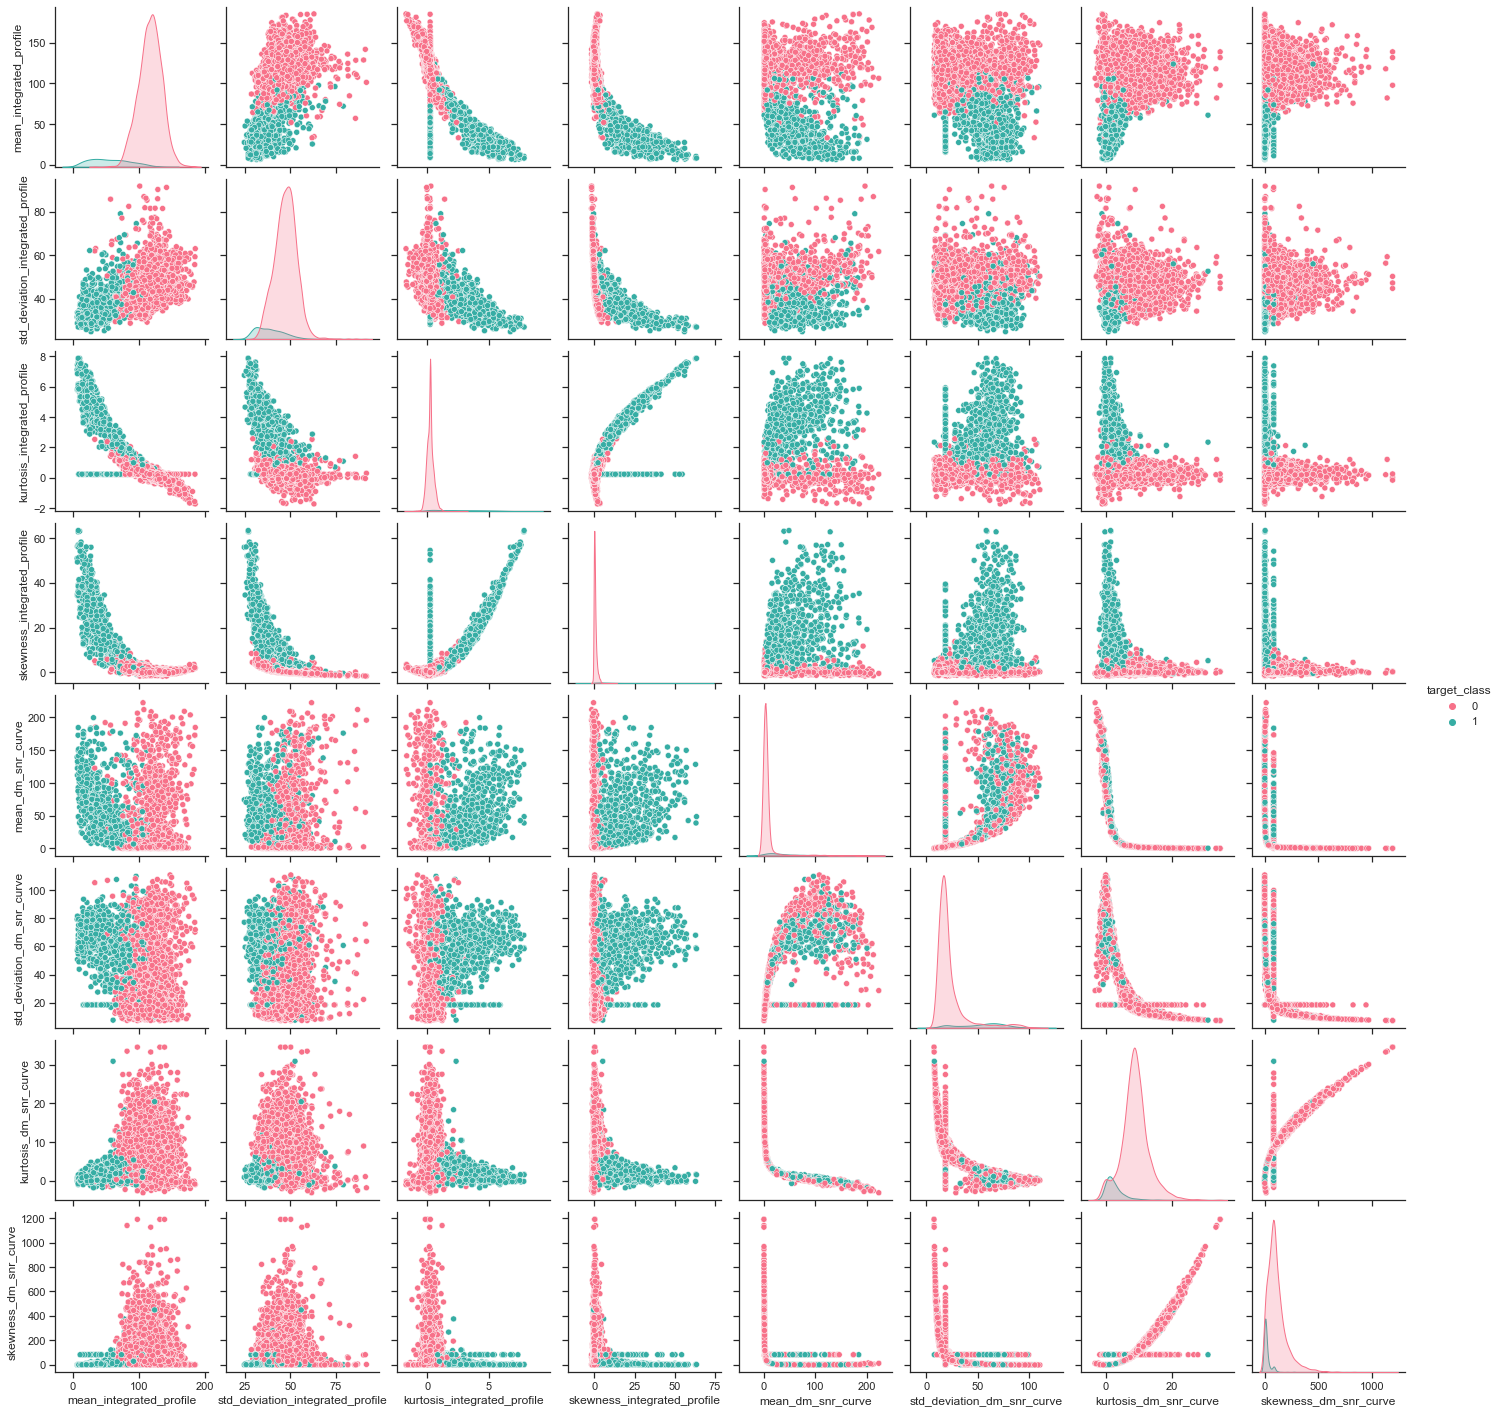

In [13]:
# visualise the distribution of the data
sns.set(style="ticks")
pair_plot = sns.pairplot(data, hue="target_class", palette="husl")
# Show the plot
plt.show()

### **Task 2:** Normalize or standardize your features as necessary. Carefully decide the  normalization or standardization technique used. [5 marks] 


**Why Standardize and Not Normalize?**
- The features have a wide range of values and different units, standardizing will transform the data giving it a mean of 0 and a standard deviation of 1, which is generally good practice for many machine learning algorithms. So, standardizing will help in bringing all of the values to a common scale.
- Features like kurtosis and skewness are sensitive to outliers. Standardizing helps in minimizing the impact of outliers.
- Standard deviation is a scale-dependent measure, so standardizing it is a good option.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_standardize = ['mean_integrated_profile', 'std_deviation_integrated_profile', 
                            'kurtosis_integrated_profile', 'skewness_integrated_profile',
                            'mean_dm_snr_curve', 'std_deviation_dm_snr_curve', 
                            'kurtosis_dm_snr_curve', 'skewness_dm_snr_curve']

data[features_to_standardize] = scaler.fit_transform(data[features_to_standardize])


### **Task 3:** Carefully decide the evaluation measure that is best suited to this application and  the dataset. Justify your choice -- What characteristics of the application and the dataset  made you decide the evaluation measure you chose. [5 marks] 


**Suitable Evaluation Metrics**

- Precision: Precision is the number of true positives divided by the sum of true positives and false positives. Since false positives (predicting a non-pulsar star as a pulsar) can be quite costly in this context, precision might be a good metric to consider.
- Recall: Recall is the number of true positives divided by the sum of true positives and false negatives. In the context of pulsar star classification, missing a true pulsar (false negative) can be more costly than falsely identifying one, making recall a critical metric.
- F1 Score: The F1 score is the harmonic mean of precision and recall, and it helps to balance the trade-off between these two metrics. Given the cost of both false positives and false negatives, the F1 score could be a suitable evaluation metric.
- Area Under the Receiver Operating Characteristic (ROC) Curve (AUC-ROC): Since the data is imbalanced, AUC-ROC could be a good choice as it is insensitive to the imbalance. It evaluates the model’s ability to discriminate between the positive and negative classes.
- Area Under the Precision-Recall Curve (AUC-PR): In imbalanced datasets, the Precision-Recall curve might be more informative than the ROC curve, and the area under the PR curve (AUC-PR) can be a good evaluation metric.

In [15]:
# define a suitable function according to evaluation measures
from sklearn.metrics import (classification_report, accuracy_score, precision_score, recall_score, f1_score, 
                             average_precision_score, confusion_matrix, roc_curve, roc_auc_score)

def evaluate_model(model, X_test, y_test, threshold=0.5):
    # Make predictions
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred = np.where(y_pred_prob > threshold, 1, 0)
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_pr = average_precision_score(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Print the evaluation report
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1))
    print("AUC-PR: {:.4f}".format(auc_pr))
    print("AUC-ROC: {:.4f}".format(roc_auc))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Pulsar', 'Pulsar'], yticklabels=['Non-Pulsar', 'Pulsar'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = {:.4f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


### **Task 4:** Compare a decision tree classifier, a kNN classifier and four SVM classifiers (one  each with “linear”, “poly”, “rbf” and “sigmoid” kernel) based on the evaluation measure selected in  Task 3. Carefully decide the evaluation methodology for this comparison (e.g., cross  validation or a single train/validation/test split or other alternatives). Explore the effect of different  parameter settings on these classifiers and find the winner classifier/ parameter setting. Why do you think  you got those comparison results? Are you surprised at the relative performance of “linear”,  “rbf” and “sigmoid” kernels? [25 marks] 

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [17]:
# prepare data fro models
X = data.drop('target_class', axis=1)
y = data['target_class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Modelling using default parameters

In [18]:
DecisionTreeClassifier(random_state=42)
KNeighborsClassifier()

KNeighborsClassifier()

In [19]:
# Define Models
models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'kNN': KNeighborsClassifier(),
    'SVM_linear': SVC(kernel='linear', probability=True, random_state=42),
    'SVM_poly': SVC(kernel='poly', probability=True, random_state=42),
    'SVM_rbf': SVC(kernel='rbf', probability=True, random_state=42),
    'SVM_sigmoid': SVC(kernel='sigmoid', probability=True, random_state=42),
}

# Train Models, Store Results, and Save Trained Models
results = {}
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'AUC-ROC': auc_roc,
    }
    trained_models[name] = model


In [20]:
# convert Results to DataFrame
results_df = pd.DataFrame(results).T
results_df

,Precision,Recall,Accuracy,F1 Score,AUC-ROC
DecisionTree,0.783654,0.848958,0.9630,0.815000,0.912034
kNN,0.949438,0.880208,0.9840,0.913514,0.956213
SVM_linear,0.964286,0.843750,0.9820,0.900000,0.967886
SVM_poly,0.969512,0.828125,0.9810,0.893258,0.958901
SVM_rbf,0.971098,0.875000,0.9855,0.920548,0.963510
SVM_sigmoid,0.295775,0.328125,0.8605,0.311111,0.859693


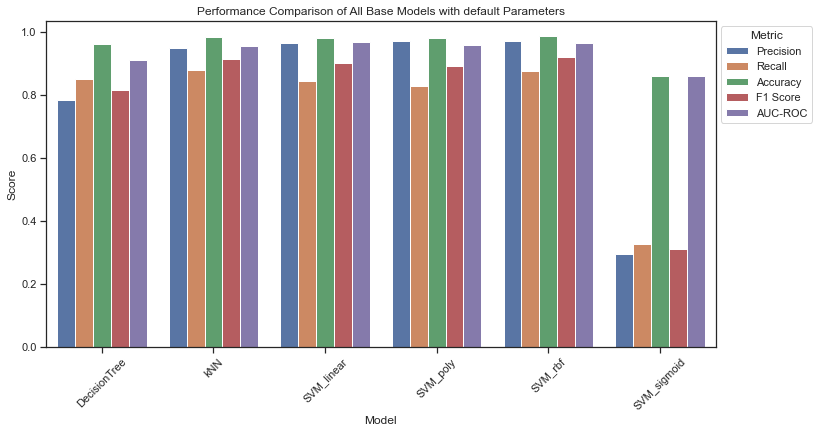

In [21]:
# plotting results
results_df_reset = results_df.reset_index().rename(columns={'index': 'Model'})
results_long = pd.melt(results_df_reset, id_vars='Model', var_name='Metric', value_name='Value')
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Model', y='Value', hue='Metric', data=results_long)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Comparison of All Base Models with default Parameters')
plt.xticks(rotation=45)
barplot.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Metric')
plt.show()

These results give us an overall performance idea of the model, which seems pretty fine for all models except for the SVM_signmoid becuase the dataset is highly imbalanced dataset. So, I will evaluate each of base models using the evaluation strategy previously defined on a per class basis, this will further my understanding of the results.

#### Detailed Evaluation of base models

Decision Tree Model Evaluation

Precision: 0.7837
Recall: 0.8490
F1 Score: 0.8150
AUC-PR: 0.6798
AUC-ROC: 0.9120

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1808
           1       0.78      0.85      0.82       192

    accuracy                           0.96      2000
   macro avg       0.88      0.91      0.90      2000
weighted avg       0.96      0.96      0.96      2000



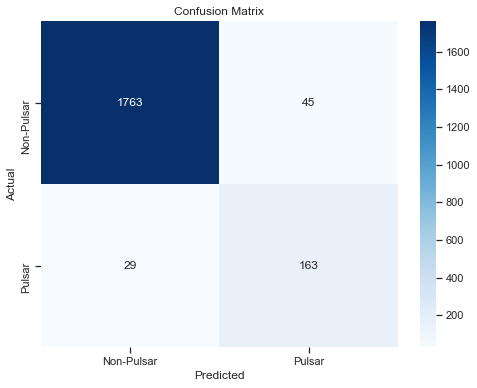

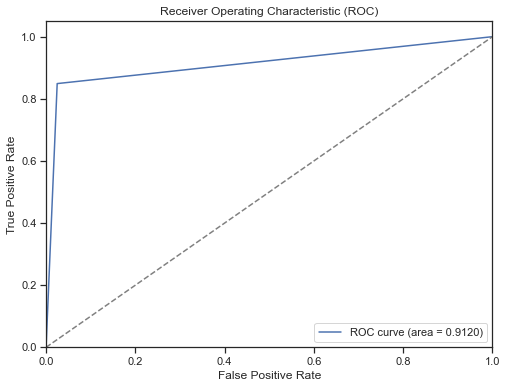

In [22]:
# Load the trained Decision Tree model
decision_tree_model = trained_models['DecisionTree']
# Evaluate the Decision Tree model
evaluate_model(decision_tree_model, X_test, y_test)

kNN Model Evaluation

Precision: 0.9494
Recall: 0.8802
F1 Score: 0.9135
AUC-PR: 0.8946
AUC-ROC: 0.9562

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1808
           1       0.95      0.88      0.91       192

    accuracy                           0.98      2000
   macro avg       0.97      0.94      0.95      2000
weighted avg       0.98      0.98      0.98      2000



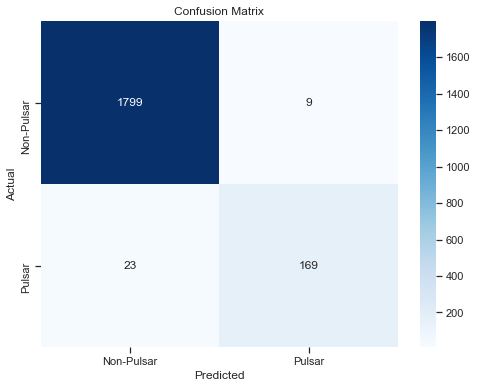

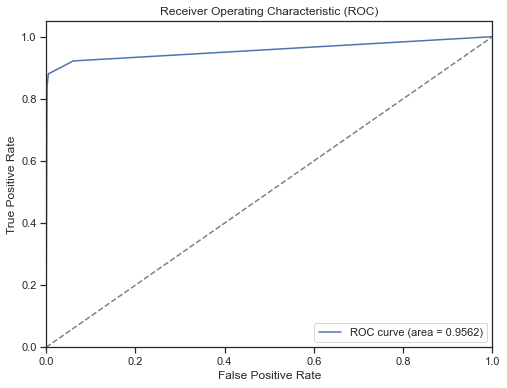

In [23]:
knn_model = trained_models['kNN']
evaluate_model(knn_model, X_test, y_test)

SVM Linear Model Evaluation

Precision: 0.9643
Recall: 0.8438
F1 Score: 0.9000
AUC-PR: 0.9287
AUC-ROC: 0.9679

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1808
           1       0.96      0.84      0.90       192

    accuracy                           0.98      2000
   macro avg       0.97      0.92      0.95      2000
weighted avg       0.98      0.98      0.98      2000



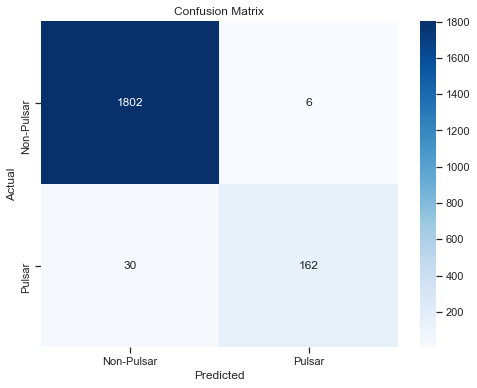

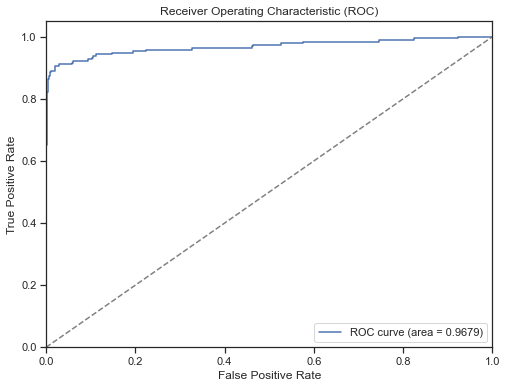

In [24]:
svm_linear_model = trained_models['SVM_linear']
evaluate_model(svm_linear_model, X_test, y_test)

SVM Poly Model Evaluation

Precision: 0.9742
Recall: 0.7865
F1 Score: 0.8703
AUC-PR: 0.9268
AUC-ROC: 0.9589

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1808
           1       0.97      0.79      0.87       192

    accuracy                           0.98      2000
   macro avg       0.98      0.89      0.93      2000
weighted avg       0.98      0.98      0.98      2000



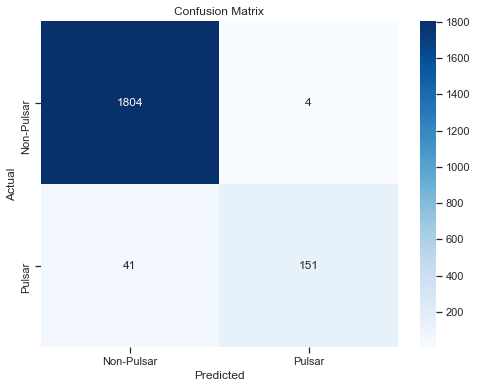

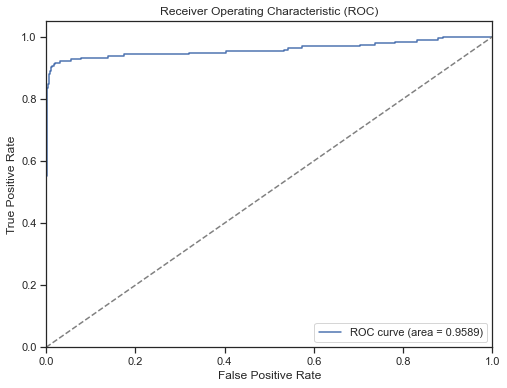

In [25]:
svm_poly_model = trained_models['SVM_poly']
evaluate_model(svm_poly_model, X_test, y_test)

SVM rbf Model Evaluation

Precision: 0.9711
Recall: 0.8750
F1 Score: 0.9205
AUC-PR: 0.9186
AUC-ROC: 0.9635

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1808
           1       0.97      0.88      0.92       192

    accuracy                           0.99      2000
   macro avg       0.98      0.94      0.96      2000
weighted avg       0.99      0.99      0.99      2000



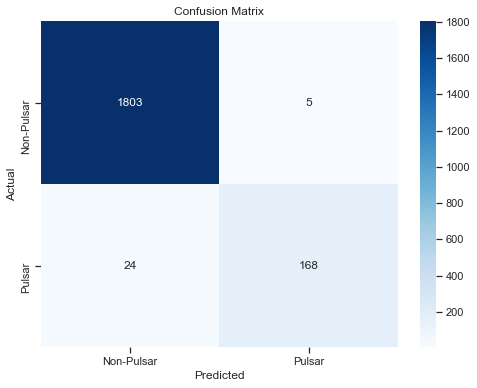

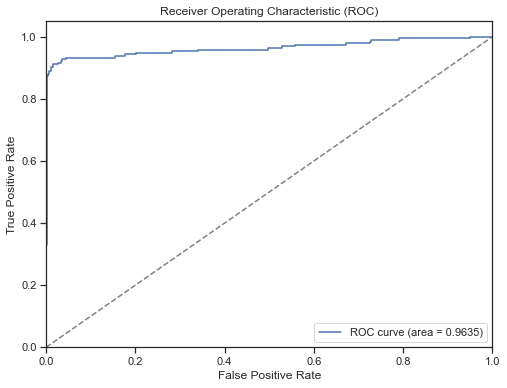

In [26]:
svm_rbf_model = trained_models['SVM_rbf']
evaluate_model(svm_rbf_model, X_test, y_test)

SVM sigmoid Model Evaluation

Precision: 0.3469
Recall: 0.0885
F1 Score: 0.1411
AUC-PR: 0.3171
AUC-ROC: 0.8597

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1808
           1       0.35      0.09      0.14       192

    accuracy                           0.90      2000
   macro avg       0.63      0.54      0.54      2000
weighted avg       0.86      0.90      0.87      2000



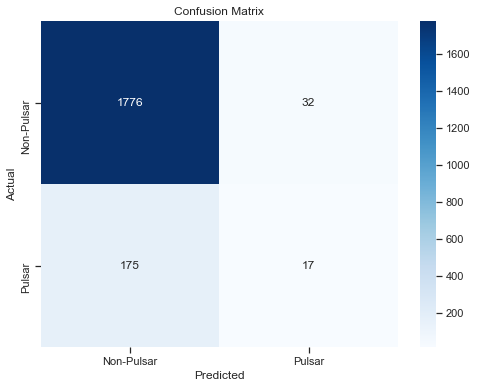

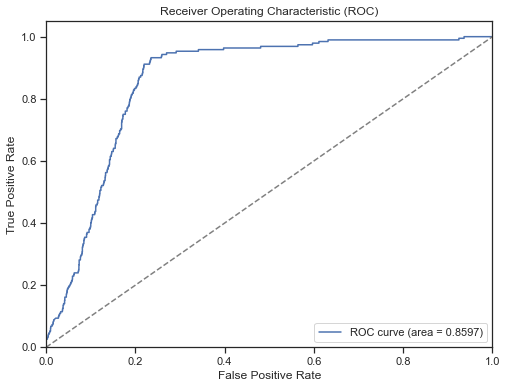

In [27]:
svm_sigmoid_model = trained_models['SVM_sigmoid']
evaluate_model(svm_sigmoid_model, X_test, y_test)

**Insights:**

SVM with RBF kernel and kNN models show the best overall performance across all metrics. The SVM with a sigmoid kernel performs poorly, especially in identifying the minority class.

- The DT model has a good performance on the majority class (0), with a precision of 0.98 and a recall of 0.98. However, it shows weaker results on the minority class (1) with a precision of 0.78 and a recall of 0.85.
- The kNN model excels in identifying the majority class with a precision of 0.99 and a recall of 1.00. It also performs well on the minority class with a precision of 0.95 and a recall of 0.88, outperforming the DT model.With an F1 score of 0.91 for the minority class and an overall accuracy of 0.98, kNN shows a strong and balanced performance.

- The SVM with a linear kernel shows excellent performance on the majority class and good performance on the minority class.
- The SVM with RBF kernel shows excellent results, particularly on the majority class. It has a slightly better balance between precision and recall for the minority class compared to the linear kernel, with a recall of 0.88.
- The SVM with a sigmoid kernel presents a stark contrast to the other models, showing a significant drop in performance.
- The SVM with a polynomial kernel performs very well on the majority class but has a lower recall for the minority class (0.79).


#### **Hyperparameter Tuning the Models for best Parameters**

In [28]:
params = {
    'DecisionTree': {
        'classifier__max_depth': [3, 5, 7, 9, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': [None, 'sqrt', 'log2']
    },
    'kNN': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'classifier__p': [1, 2]
    },
    'SVM_linear': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__tol': [1e-4, 1e-3, 1e-2]
    },
    'SVM_poly': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__degree': [2, 3, 4, 5],
        'classifier__coef0': [0, 1, 2],
        'classifier__tol': [1e-4, 1e-3, 1e-2]
    },
    'SVM_rbf': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__gamma': [0.01, 0.1, 1, 'scale', 'auto'],
        'classifier__tol': [1e-4, 1e-3, 1e-2]
    },
    'SVM_sigmoid': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__gamma': [0.01, 0.1, 1, 'scale', 'auto'],
        'classifier__coef0': [0, 1, 2],
        'classifier__tol': [1e-4, 1e-3, 1e-2]
    },
}


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

results = {}
trained_models = {}  # store the trained models

for name, model in models.items():
    # Create a pipeline
    pipeline = Pipeline([('classifier', model)])
    
    # Get the parameters for the current model
    param_grid = params[name]
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall_weighted')  
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Store the best trained model
    trained_models[name] = best_model
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    
    # Store results including the parameters of the best model
    results[name] = {
        'Best Params': grid_search.best_params_,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'AUC-ROC': auc_roc,
    }

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

,Best Params,Precision,Recall,Accuracy,F1 Score,AUC-ROC
DecisionTree,"{'classifier__max_depth': 5, 'classifier__max_...",0.938889,0.880208,0.9830,0.908602,0.948617
kNN,"{'classifier__algorithm': 'auto', 'classifier_...",0.933333,0.875000,0.9820,0.903226,0.953618
SVM_linear,"{'classifier__C': 10, 'classifier__tol': 0.0001}",0.964286,0.843750,0.9820,0.900000,0.967278
SVM_poly,"{'classifier__C': 10, 'classifier__coef0': 2, ...",0.965318,0.869792,0.9845,0.915068,0.973636
SVM_rbf,"{'classifier__C': 100, 'classifier__gamma': 0....",0.921348,0.854167,0.9790,0.886486,0.958417
SVM_sigmoid,"{'classifier__C': 1, 'classifier__coef0': 0, '...",0.963415,0.822917,0.9800,0.887640,0.967716


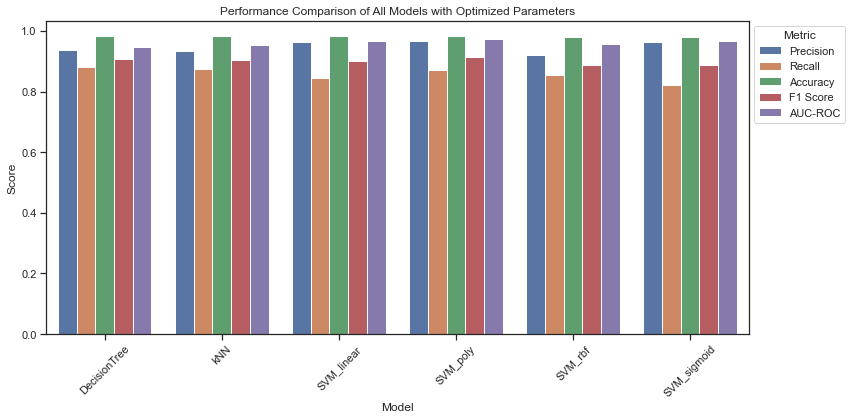

In [30]:
results_df_reset = results_df.reset_index().rename(columns={'index': 'Model'})
results_long = pd.melt(results_df_reset, id_vars='Model', var_name='Metric', value_name='Value')
results_long = results_long[results_long['Metric'] != 'Best Params']

# Plotting
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Model', y='Value', hue='Metric', data=results_long)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Comparison of All Models with Optimized Parameters')
plt.xticks(rotation=45)
barplot.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Metric')
plt.tight_layout()
plt.show()

**Insights**
- Visually It can be seen that hyperparameter optimisation has improved the overall performance of the models, notably the SVM_sigmoid.
- I have further explored the models below.

In [31]:
trained_models

{'DecisionTree': Pipeline(steps=[('classifier',
                  DecisionTreeClassifier(max_depth=5, random_state=42))]),
 'kNN': Pipeline(steps=[('classifier', KNeighborsClassifier(p=1, weights='distance'))]),
 'SVM_linear': Pipeline(steps=[('classifier',
                  SVC(C=10, kernel='linear', probability=True, random_state=42,
                      tol=0.0001))]),
 'SVM_poly': Pipeline(steps=[('classifier',
                  SVC(C=10, coef0=2, degree=2, kernel='poly', probability=True,
                      random_state=42, tol=0.0001))]),
 'SVM_rbf': Pipeline(steps=[('classifier',
                  SVC(C=100, gamma=0.1, probability=True, random_state=42,
                      tol=0.0001))]),
 'SVM_sigmoid': Pipeline(steps=[('classifier',
                  SVC(C=1, coef0=0, gamma=0.01, kernel='sigmoid',
                      probability=True, random_state=42, tol=0.0001))])}

Decision Tree Model Evaluation

Precision: 0.9389
Recall: 0.8802
F1 Score: 0.9086
AUC-PR: 0.9005
AUC-ROC: 0.9486

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1808
           1       0.94      0.88      0.91       192

    accuracy                           0.98      2000
   macro avg       0.96      0.94      0.95      2000
weighted avg       0.98      0.98      0.98      2000



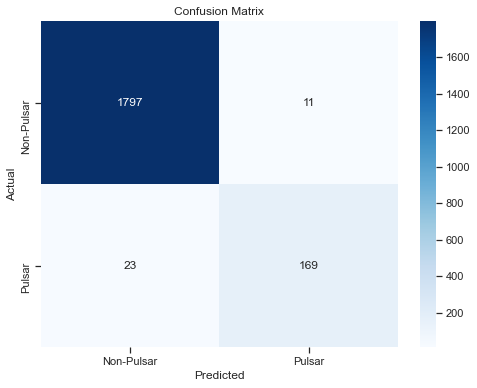

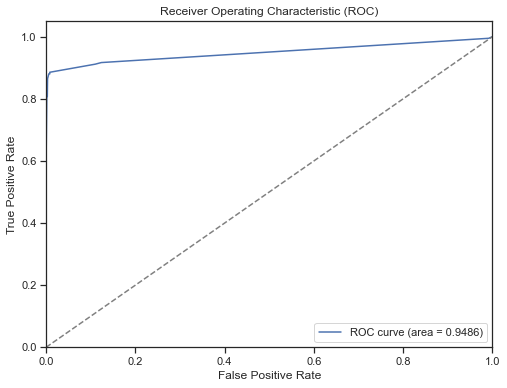

In [32]:
# Load the trained Decision Tree model
decision_tree_model = trained_models['DecisionTree']
# Evaluate the Decision Tree model
evaluate_model(decision_tree_model, X_test, y_test)

kNN Model Evaluation

Precision: 0.9333
Recall: 0.8750
F1 Score: 0.9032
AUC-PR: 0.9011
AUC-ROC: 0.9536

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1808
           1       0.93      0.88      0.90       192

    accuracy                           0.98      2000
   macro avg       0.96      0.93      0.95      2000
weighted avg       0.98      0.98      0.98      2000



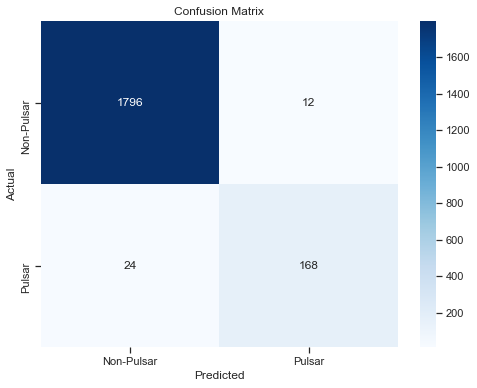

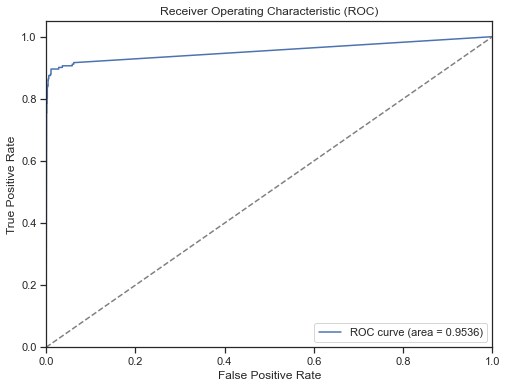

In [33]:
knn_model = trained_models['kNN']
evaluate_model(knn_model, X_test, y_test)

SVM Linear Model Evaluation

Precision: 0.9643
Recall: 0.8438
F1 Score: 0.9000
AUC-PR: 0.9282
AUC-ROC: 0.9673

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1808
           1       0.96      0.84      0.90       192

    accuracy                           0.98      2000
   macro avg       0.97      0.92      0.95      2000
weighted avg       0.98      0.98      0.98      2000



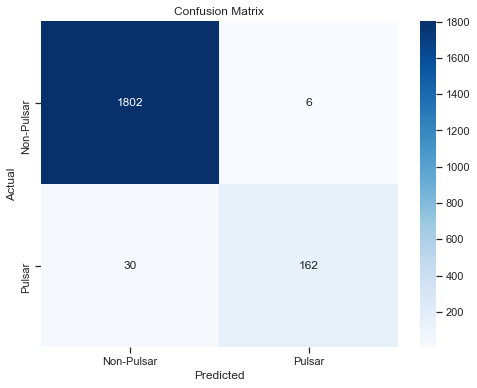

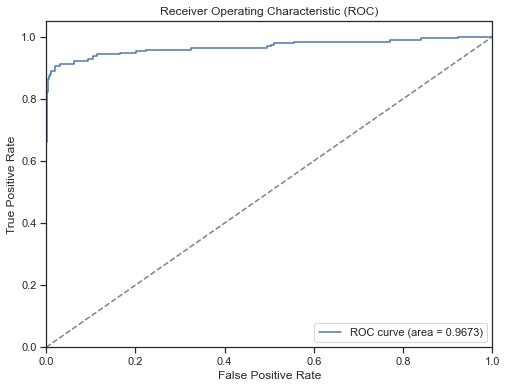

In [34]:
svm_linear_model = trained_models['SVM_linear']
evaluate_model(svm_linear_model, X_test, y_test)

SVM Poly Model Evaluation

Precision: 0.9647
Recall: 0.8542
F1 Score: 0.9061
AUC-PR: 0.9351
AUC-ROC: 0.9736

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1808
           1       0.96      0.85      0.91       192

    accuracy                           0.98      2000
   macro avg       0.97      0.93      0.95      2000
weighted avg       0.98      0.98      0.98      2000



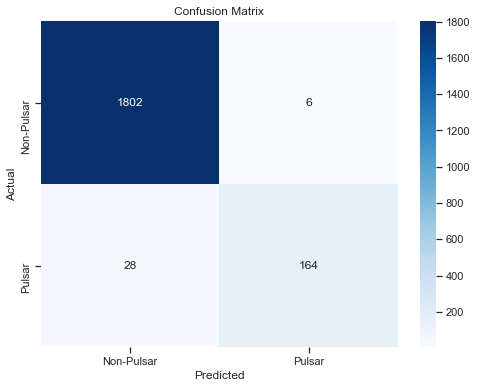

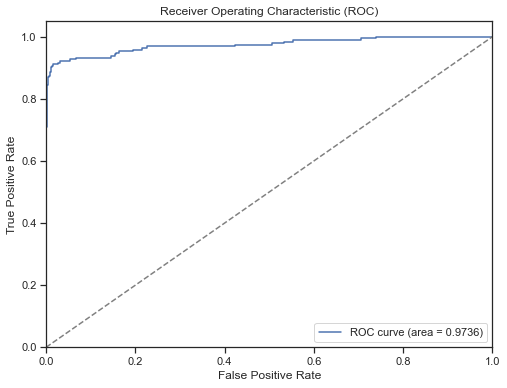

In [35]:
svm_poly_model = trained_models['SVM_poly']
evaluate_model(svm_poly_model, X_test, y_test)

SVM rbf Model Evaluation

Precision: 0.9357
Recall: 0.8333
F1 Score: 0.8815
AUC-PR: 0.9123
AUC-ROC: 0.9584

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1808
           1       0.94      0.83      0.88       192

    accuracy                           0.98      2000
   macro avg       0.96      0.91      0.93      2000
weighted avg       0.98      0.98      0.98      2000



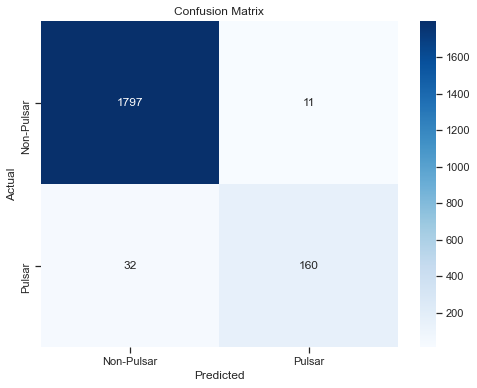

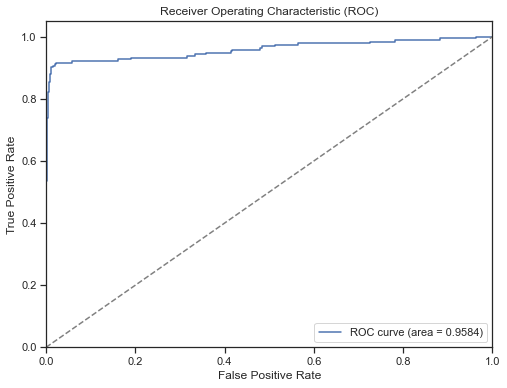

In [36]:
svm_rbf_model = trained_models['SVM_rbf']
evaluate_model(svm_rbf_model, X_test, y_test)

SVM sigmoid Model Evaluation

Precision: 0.9586
Recall: 0.8438
F1 Score: 0.8975
AUC-PR: 0.9253
AUC-ROC: 0.9677

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1808
           1       0.96      0.84      0.90       192

    accuracy                           0.98      2000
   macro avg       0.97      0.92      0.94      2000
weighted avg       0.98      0.98      0.98      2000



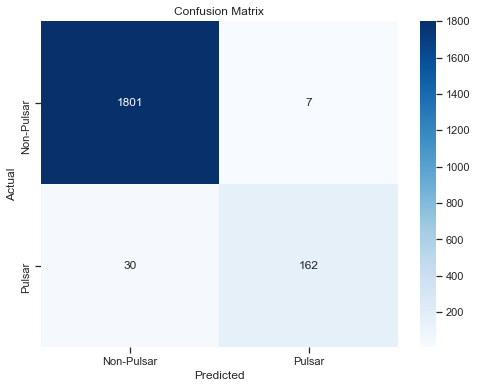

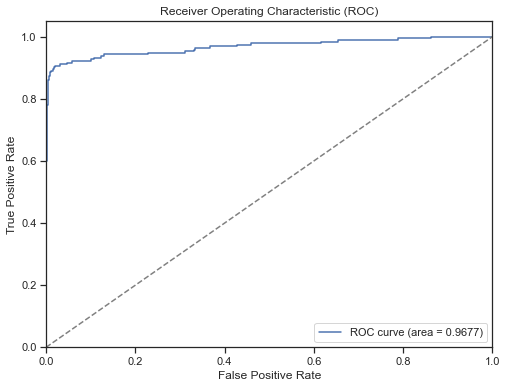

In [37]:
svm_sigmoid_model = trained_models['SVM_sigmoid']
evaluate_model(svm_sigmoid_model, X_test, y_test)

SVM with polynomial kernel and kNN consistently performed well, while SVM with sigmoid kernel showed the most dramatic improvement post-optimisation. Decision Tree and SVM with linear kernel also benefited from tuning, demonstrating enhanced precision and balance across classes.

##### **Detailed Insights**

**Decision Tree:**
- The optimised model shows an improvement in precision and f1-score for the positive class, while maintaining high performance for the negative class. There is a noticeable increase in the macro average precision, recall, and f1-score, indicating better overall performance.

**kNN:**
- The optimised model maintains its high performance, with slight improvements across all metrics. It continues to be one of the most reliable models for this dataset.

**SVM Linear Kernel:**
- The optimised model maintains its high precision for the positive class but doesn't show significant improvement in recall. It remains a strong model, especially if precision is prioritised.

**SVM Polynomial Kernel:**
- The optimised model shows improvement in recall for the positive class, leading to a higher f1-score. It strikes a good balance between precision and recall, making it one of the better models post-optimisation.

**SVM RBF Kernel:**
- The optimised model maintains high performance, though there is a slight drop in precision for the positive class compared to the base model. Despite this, it remains one of the top-performing models.

**SVM Sigmoid Kernel:**
- The optimised model shows a dramatic improvement, especially for the positive class, making it a viable option post-optimisation. It demonstrates the potential impact of hyperparameter tuning, particularly for models that may not perform well with default settings.

### **Task 5:** Based on a filter technique, identify the three most discriminative features and the  three least discriminative features in this dataset. Run the SVM classifiers with the four  kernels on the top three and the bottom three features. How do the results compare? [10  marks] 

In [38]:
from sklearn.feature_selection import f_classif

X = data.drop('target_class', axis=1)
y = data['target_class']
# use the f_classif function from sklearn.feature_selection to calculate the F-statistic for each feature.
f_statistic, p_values = f_classif(X, y)


In [39]:
# Rank the Features
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'F-Statistic': f_statistic,
    'P-Value': p_values
}).sort_values(by='F-Statistic', ascending=False)


In [40]:
# Select the Top 3 and Bottom 3 Features
top_3_features = feature_ranking.head(3)['Feature'].tolist()
bottom_3_features = feature_ranking.tail(3)['Feature'].tolist()

In [41]:
# implement the SVM classifier with the top features and print the results

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print('TOP 3 Features')
    print(f'SVM with {kernel} kernel:')
    
    # Top 3 Features
    X_top = X[top_3_features]
    X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Top 3 Features:')
    print(classification_report(y_test, y_pred))
    

TOP 3 Features
SVM with linear kernel:
Top 3 Features:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1808
           1       0.95      0.77      0.85       192

    accuracy                           0.97      2000
   macro avg       0.97      0.88      0.92      2000
weighted avg       0.97      0.97      0.97      2000

TOP 3 Features
SVM with poly kernel:
Top 3 Features:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1808
           1       0.97      0.80      0.88       192

    accuracy                           0.98      2000
   macro avg       0.98      0.90      0.93      2000
weighted avg       0.98      0.98      0.98      2000

TOP 3 Features
SVM with rbf kernel:
Top 3 Features:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1808
           1       0.97      0.84      0.90       192

    accuracy          

**Top 3 Features**

**Linear Kernel**
- High precision, recall, and F1-score for class 0 (not a pulsar).
- Reasonable performance for class 1 (pulsar), but with a noticeably lower recall.
- Overall accuracy is 97%, indicating a strong model.

**Polynomial Kernel**
- Similar to the linear kernel, but with slightly improved performance for class 1.
- Recall for class 1 is now 80%, a notable improvement.
- Overall accuracy is 98%.

**RBF Kernel**
- Further improvement for class 1, with a recall of 84%.
- The model maintains high precision and F1-score across both classes.
- Overall accuracy remains high at 98%.

**Sigmoid Kernel**
- Significant drop in performance, especially for class 1.
- Precision, recall, and F1-score for class 1 are much lower compared to other kernels.
- Overall accuracy is 84%, the lowest among the top 3 features classifiers.


In [42]:
# bottom features and show results
for kernel in kernels:
    print('Bottom 3 Features')
    print(f'SVM with {kernel} kernel:')
    # Bottom 3 Features
    X_bottom = X[bottom_3_features]
    X_train, X_test, y_train, y_test = train_test_split(X_bottom, y, test_size=0.2, random_state=42)
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Bottom 3 Features:')
    print(classification_report(y_test, y_pred))
    print('-' * 50)


Bottom 3 Features
SVM with linear kernel:
Bottom 3 Features:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1808
           1       0.88      0.57      0.69       192

    accuracy                           0.95      2000
   macro avg       0.92      0.78      0.83      2000
weighted avg       0.95      0.95      0.95      2000

--------------------------------------------------
Bottom 3 Features
SVM with poly kernel:
Bottom 3 Features:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1808
           1       0.90      0.56      0.69       192

    accuracy                           0.95      2000
   macro avg       0.93      0.78      0.83      2000
weighted avg       0.95      0.95      0.95      2000

--------------------------------------------------
Bottom 3 Features
SVM with rbf kernel:
Bottom 3 Features:
              precision    recall  f1-score   support

           

**Bottom 3 Features**

**Linear Kernel**
- Decent performance for class 0, but a drop in recall for class 1 to 57%.
- Precision for class 1 is also lower compared to the top 3 features.
- Overall accuracy is 95%.

**Polynomial Kernel**
- Similar performance to the linear kernel for the bottom 3 features.
- Slight improvement in precision for class 1.
- Overall accuracy remains at 95%.

**RBF Kernel**
- Comparable performance to the polynomial kernel.
- Recall for class 1 is at 58%, indicating challenges in correctly identifying pulsars.
- Overall accuracy is 95%.

**Sigmoid Kernel**
- A drop in performance similar to the top 3 features, but not as severe.
- Precision and recall for class 1 are low, affecting the F1-score.
- Overall accuracy is 85%.


#### **Insights**
- The SVM classifiers trained on the top 3 features generally perform better than those trained on the bottom 3 features, particularly for identifying pulsars (class 1).
- The RBF kernel appears to be the most effective for this task, achieving the highest recall for class 1 when using the top 3 features.
- The sigmoid kernel consistently shows lower performance, especially in terms of precision and recall for class 1, indicating it may not be the best choice for this dataset and problem.


These results highlight the importance of feature selection in building effective models, as the top features enabled models to achieve higher accuracy and better balanced performance across both classes.

### **Task 6:** Carefully identify the most discriminating features to predict the binary outcome of  the dataset using one wrapper feature selection technique. This should be done for each of  the decision tree, kNN and four SVM classifiers from part Task 4. Report and discuss the  differences between the feature subsets produced by the filter (Task 5) and the wrapper  technique.

In [43]:
from sklearn.feature_selection import RFE


# Define classifiers
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'kNN': KNeighborsClassifier(),
    'SVM Linear': SVC(kernel='linear'),
    'SVM RBF': SVC(kernel='rbf'),
    'SVM Poly': SVC(kernel='poly'),
    'SVM Sigmoid': SVC(kernel='sigmoid')
}

In [44]:
# Applying RFE
num_features_to_select = 3

for name, model in models.items():
    selector = RFE(estimator=model, n_features_to_select=num_features_to_select)
    selector.fit(X_train, y_train)

    X_train_rfe = selector.fit_transform(X_train, y_train)
    X_test_rfe = selector.transform(X_test)
    
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)
    

    print('-' * 50)
    print(f'{name} model:')
    print('Selected Features:')
    for i in range(X_train.shape[1]):
        print(f'{X_train.columns[i]}: {"Selected" if selector.support_[i] else "Not Selected"}')
    print('Feature Ranking:', selector.ranking_)
    print('-' * 50)
    print(f'{name} model:')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))

--------------------------------------------------
Decision Tree model:
Selected Features:
kurtosis_dm_snr_curve: Selected
std_deviation_integrated_profile: Selected
skewness_dm_snr_curve: Selected
Feature Ranking: [1 1 1]
--------------------------------------------------
Decision Tree model:
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1808
           1       0.67      0.68      0.68       192

    accuracy                           0.94      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.94      0.94      0.94      2000

Accuracy: 0.9375
--------------------------------------------------
kNN model:
Selected Features:
kurtosis_dm_snr_curve: Selected
std_deviation_integrated_profile: Selected
skewness_dm_snr_curve: Selected
Feature Ranking: [1 1 1]
--------------------------------------------------
kNN model:
Classification Report:
               precision    recall  f1-

**Wrapper Method (Using RFE with Different Classifiers):**

**Decision Tree, kNN, All SVM Kernels:**
- Selected Features: 
  - kurtosis_dm_snr_curve, 
  - std_deviation_integrated_profile, 
  - skewness_dm_snr_curve
- Accuracy Ranges: 0.852 (SVM Sigmoid) to 0.954 (SVM RBF)


**Filter Method:**

Top 3 Features for SVM with Different Kernels
- 'kurtosis_integrated_profile'
- 'skewness_integrated_profile'
- 'mean_integrated_profile'



#### **Discussion**

The wrapper method selected features predominantly from the DM-SNR curve, while the filter method selected features from the integrated profile.
This difference highlights the variability that can occur in feature selection based on the method used. The integrated profile and DM-SNR curve describe different aspects of the pulsar stars, and it appears that the two methods have found different sets of features to be more indicative of the binary outcome.

The accuracy ranges show that SVM with RBF kernel and SVM with Linear kernel performed best among all the classifiers after feature selection using the wrapper method.

The filter method results show a very high performance for SVM with different kernels maintaining overall higher accuracies.

### **Task 7:** Compare the performance of different classifiers using the different feature  subsets found in Tasks 5 and 6 and compare it to the results on original dataset that you  reported in Task 4. Have the results improved or worsened after feature selection? Is the  relative performance of different classifiers and configuration settings in line with your expectation?  [10 marks] 

In [45]:
X = data.drop('target_class', axis=1)
y = data['target_class']

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'SVM Linear': SVC(kernel='linear'),
    'SVM Polynomial': SVC(kernel='poly'),
    'SVM RBF': SVC(kernel='rbf'),
    'SVM Sigmoid': SVC(kernel='sigmoid')
}

# Features selected by Wrapper Method
wrapper_features = ['kurtosis_dm_snr_curve', 'std_deviation_integrated_profile', 'skewness_dm_snr_curve']
X_train_wrapper = X_train[wrapper_features]
X_test_wrapper = X_test[wrapper_features]

# Evaluate models on the dataset with features selected by the wrapper method
print("Results on Wrapper Method Selected Features:")
for name, clf in models.items():
    clf.fit(X_train_wrapper, y_train)
    y_pred = clf.predict(X_test_wrapper)
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))



Results on Wrapper Method Selected Features:

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1808
           1       0.65      0.68      0.66       192

    accuracy                           0.93      2000
   macro avg       0.81      0.82      0.81      2000
weighted avg       0.94      0.93      0.93      2000


k-Nearest Neighbors Results:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1808
           1       0.79      0.61      0.69       192

    accuracy                           0.95      2000
   macro avg       0.87      0.80      0.83      2000
weighted avg       0.94      0.95      0.94      2000


SVM Linear Results:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1808
           1       0.88      0.57      0.69       192

    accuracy                           0.95      2000
   macro

In [46]:
X = data.drop('target_class', axis=1)
y = data['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:

# Features selected by Filter Method
filter_features = ['kurtosis_integrated_profile', 'skewness_integrated_profile', 'mean_integrated_profile']
X_train_filter = X_train[filter_features]
X_test_filter = X_test[filter_features]

# Evaluate models on the dataset with features selected by the filter method
print("Results on Filter Method Selected Features:")
for name, clf in models.items():
    clf.fit(X_train_filter, y_train)
    y_pred = clf.predict(X_test_filter)
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))


Results on Filter Method Selected Features:

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1808
           1       0.78      0.86      0.82       192

    accuracy                           0.96      2000
   macro avg       0.88      0.92      0.90      2000
weighted avg       0.97      0.96      0.96      2000


k-Nearest Neighbors Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1808
           1       0.91      0.87      0.89       192

    accuracy                           0.98      2000
   macro avg       0.95      0.93      0.94      2000
weighted avg       0.98      0.98      0.98      2000


SVM Linear Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1808
           1       0.95      0.77      0.85       192

    accuracy                           0.97      2000
   macro 

**Results Comparison of Original Data, Wrapper Method Selected Features Data, and Filter Method Selected Features Data:**
- Feature selection has led to varied results. The wrapper method seems to have adversely affected the classifiers more than the filter method.
- For SVM, the linear, polynomial, and RBF kernels maintain good performance even after feature selection, but the sigmoid kernel shows a significant drop.
- The relative performance of different classifiers and configuration settings seems to be in line with expectations, as simpler models like decision trees are more affected by the reduction in features, while complex models like SVM maintain performance to a certain extent.
- The results after feature selection might have worsened in some cases, but this could be due to the reduced dimensionality leading to loss of information. The feature selection methods might have removed features that were crucial for making accurate predictions.
- It's also worth noting that the classes are imbalanced, with class 0 (non-pulsar) being much more prevalent than class 1 (pulsar). This might have affected the classifiers' ability to correctly classify the minority class after feature selection. Balancing the dataset or using different evaluation metrics like the area under the ROC curve (AUC-ROC) might provide more insight into the models' performance.

### **Task 8:** Plot the ROC curves for the "1" class and the different classification models. What  do you learn from this ROC curve? Which classifier/configuration is best suited for this  task? Are you satisfied with the performance? [15 marks] 


Based on the ROC curves and AUC scores of the models on full Data it's clear that:
- SVM Poly Model shows the best overall performance for this problem. It is plotted above for all models using the evaluation function

In [48]:
# Train the optimised SVM model again on full data with optimised hyperparameters again to reproduce roc curve
svm_poly_pipeline = Pipeline(steps=[
    ('classifier', SVC(C=10, coef0=2, degree=2, kernel='poly', probability=True, random_state=42, tol=0.0001))
])

svm_poly_pipeline.fit(X_train, y_train)



Pipeline(steps=[('classifier',
                 SVC(C=10, coef0=2, degree=2, kernel='poly', probability=True,
                     random_state=42, tol=0.0001))])

Precision: 0.9647
Recall: 0.8542
F1 Score: 0.9061
AUC-PR: 0.9351
AUC-ROC: 0.9736

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1808
           1       0.96      0.85      0.91       192

    accuracy                           0.98      2000
   macro avg       0.97      0.93      0.95      2000
weighted avg       0.98      0.98      0.98      2000



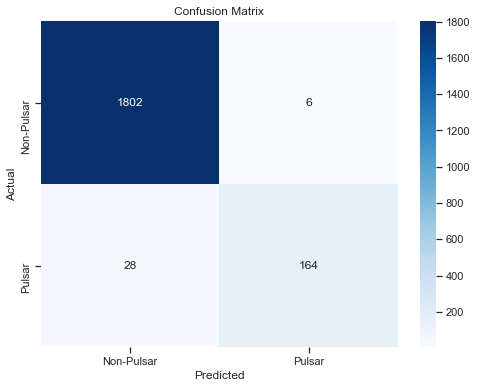

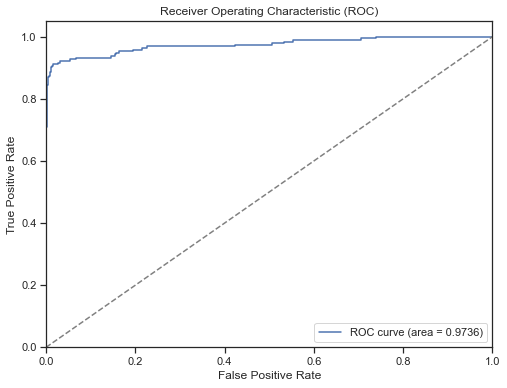

In [49]:
evaluate_model(model=svm_poly_pipeline, X_test=X_test, y_test=y_test)

- The ROC curve is very close to the top left corner, which indicates a very good performance of the classifier.
- The Area Under the Curve (AUC) is 0.9736, which is close to 1. This is an excellent score, suggesting that the classifier has a high ability to distinguish between positive (pulsar stars) and negative classes (noises, interferences, etc.).
- The AUC of 0.9736 indicates an excellent performance. Such a high AUC suggests that the model is capturing the underlying patterns well and can differentiate effectively between the classes. Therefore, from the information provided, I'm satisfied with the performance of this classifier on the given task.